# **1. Perkenalan Dataset**


# 📌 Perkenalan Dataset

## 🎯 Dataset yang Digunakan

Dalam proyek ini, kita akan menggunakan dataset transaksi perbankan yang berisi informasi mengenai berbagai transaksi keuangan nasabah. Dataset ini memenuhi kriteria yang telah ditentukan, yaitu:

### 🔍 Sumber Dataset
Dataset ini berasal dari sumber internal dan berisi transaksi tanpa label kelas, sehingga cocok untuk digunakan dalam analisis clustering.

### 📌 Karakteristik Dataset
1. **Tanpa Label**: Dataset ini tidak memiliki label atau kelas yang sudah ditentukan sebelumnya.
2. **Jumlah Baris**: Dataset terdiri dari **2.512 baris**, sehingga cukup besar untuk analisis yang bermakna.
3. **Tipe Data**:
   - **Kategorikal**: Termasuk `TransactionType` (Debit/Kredit), `Channel` (ATM/Online), `CustomerOccupation`, dan lainnya.
   - **Numerikal**: Termasuk `TransactionAmount`, `CustomerAge`, `TransactionDuration`, dan `AccountBalance`.

### ⚠️ Pembatasan Dataset
- Dataset ini **tidak berasal dari latihan clustering yang umum digunakan** seperti customer segmentation, sehingga memberikan wawasan baru dalam analisis.
- Data transaksi memiliki **pola yang tidak selalu terstruktur**, yang bisa menjadi tantangan menarik dalam clustering.

📊 **Selanjutnya, kita akan melakukan eksplorasi lebih dalam terhadap dataset ini untuk memahami pola dan karakteristik datanya!** 🚀
"""

# **2. Import Library**

In [ ]:
# Untuk manipulasi data
import pandas as pd
import numpy as np

# Untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

# Untuk preprocessing data
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Untuk clustering
from sklearn.cluster import KMeans, DBSCAN

# Untuk evaluasi model clustering
from sklearn.metrics import silhouette_score

# Untuk reduksi dimensi (jika diperlukan untuk visualisasi)
from sklearn.decomposition import PCA

# Mengatur tampilan grafik agar lebih jelas
sns.set_style("whitegrid")

print("✅ Semua library telah berhasil diimpor!")


✅ Semua library telah berhasil diimpor!


Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

# **3. Memuat Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# ID file dari Google Drive
file_id = "1PLQCr9BUroKPeRF3dmrlaKp4Hp1x0WeU"

# Buat URL untuk membaca file
file_url = f"https://drive.google.com/uc?id={file_id}"

# Memuat dataset
df = pd.read_csv(file_url)

# Menampilkan 5 baris pertama untuk memastikan data terbaca dengan benar
print("✅ Dataset berhasil dimuat!")
df.head()


✅ Dataset berhasil dimuat!


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

## Memahami struktur data

In [ ]:
# Cek jumlah baris dan kolom
print(f"Dataset memiliki {df.shape[0]} baris dan {df.shape[1]} kolom.\n")

# Cek informasi tipe data tiap kolom
print("Informasi dataset:\n")
df.info()

Dataset memiliki 2512 baris dan 16 kolom.

Informasi dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts  

## Menangani Data yang Hilang

In [ ]:
# Cek jumlah nilai yang hilang di setiap kolom
missing_values = df.isnull().sum()
print("Jumlah missing values di setiap kolom:\n", missing_values)

# Jika ada missing values, tampilkan persentase
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("\nPersentase missing values:\n", missing_percentage)

Jumlah missing values di setiap kolom:
 TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64

Persentase missing values:
 TransactionID              0.0
AccountID                  0.0
TransactionAmount          0.0
TransactionDate            0.0
TransactionType            0.0
Location                   0.0
DeviceID                   0.0
IP Address                 0.0
MerchantID                 0.0
Channel                    0.0
CustomerAge                0.0
CustomerOccupation         0.0
TransactionDuration        0.0
LoginAttempts              0.0
AccountBalance      

## Analisis Distribusi Data

Statistik deskriptif untuk data numerik:

       TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
count        2512.000000  2512.000000          2512.000000    2512.000000   
mean          297.593778    44.673965           119.643312       1.124602   
std           291.946243    17.792198            69.963757       0.602662   
min             0.260000    18.000000            10.000000       1.000000   
25%            81.885000    27.000000            63.000000       1.000000   
50%           211.140000    45.000000           112.500000       1.000000   
75%           414.527500    59.000000           161.000000       1.000000   
max          1919.110000    80.000000           300.000000       5.000000   

       AccountBalance  
count     2512.000000  
mean      5114.302966  
std       3900.942499  
min        101.250000  
25%       1504.370000  
50%       4735.510000  
75%       7678.820000  
max      14977.990000  


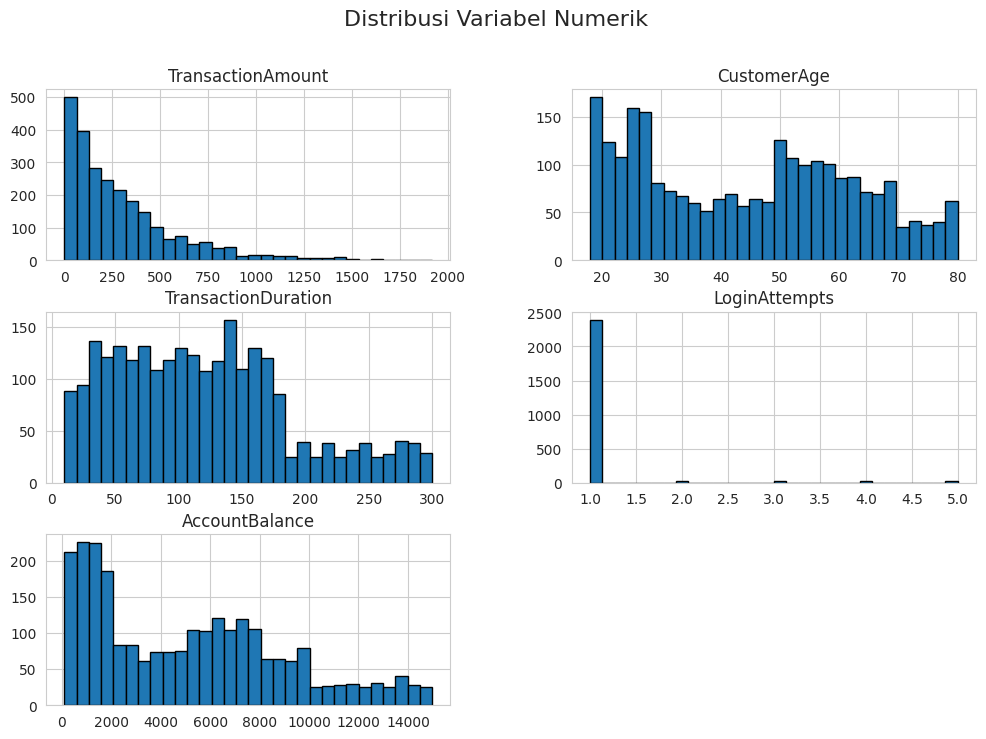

In [ ]:
# Statistik deskriptif untuk variabel numerik
print("Statistik deskriptif untuk data numerik:\n")
print(df.describe())

# Visualisasi distribusi dengan histogram
df.hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle("Distribusi Variabel Numerik", fontsize=16)
plt.show()

## Analisis Korelasi

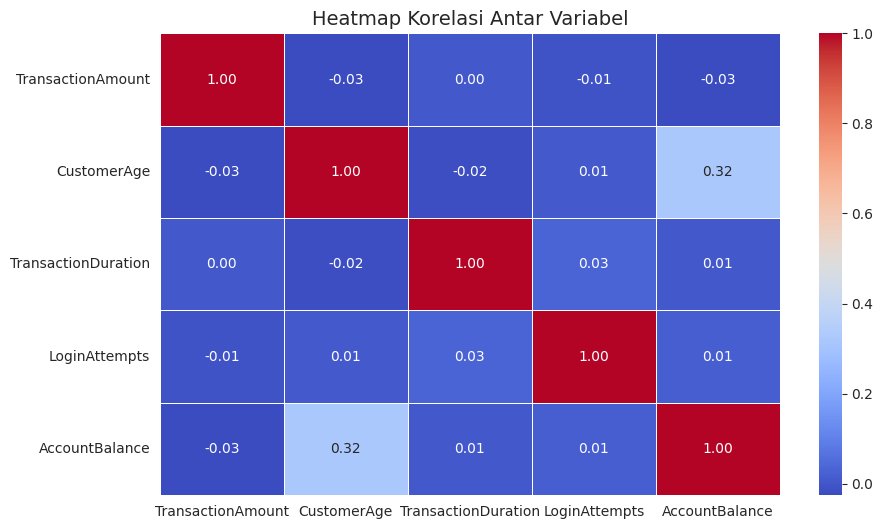

In [ ]:
# Pilih hanya kolom numerik
numerical_df = df.select_dtypes(include=["number"])

# Hitung korelasi
corr_matrix = numerical_df.corr()

# Plot heatmap korelasi
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Variabel", fontsize=14)
plt.show()

## Visualisasi Data



<ipython-input-13-6b9f3e772d47>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="viridis")
<ipython-input-13-6b9f3e772d47>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="viridis")
<ipython-input-13-6b9f3e772d47>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="viridis")


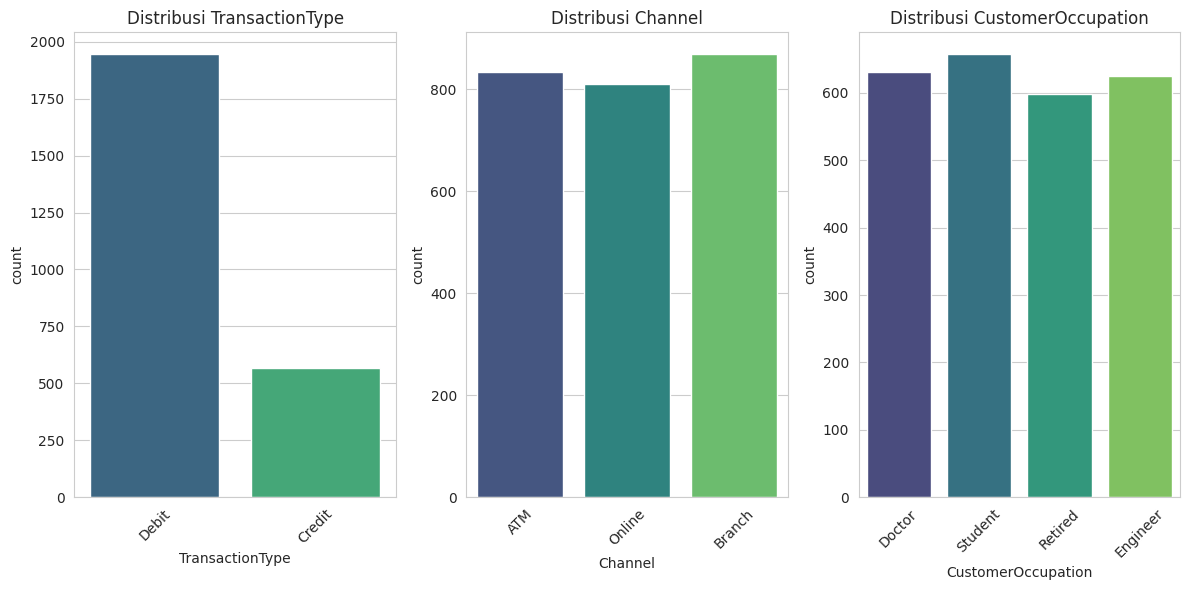

In [ ]:
# Pilih kolom kategorikal tanpa ID
categorical_columns = df.select_dtypes(include=["object"]).columns

# Hapus kolom ID dari daftar jika ada
categorical_columns = [col for col in categorical_columns if "id" not in col.lower()]

# Filter hanya kolom yang memiliki sedikit kategori (≤ 10)
categorical_columns = [col for col in categorical_columns if df[col].nunique() <= 10]

# Visualisasi dengan barplot
plt.figure(figsize=(len(categorical_columns) * 4, 6))  # Dinamis sesuai jumlah kolom

for i, col in enumerate(categorical_columns[:5]):  # Ambil max 5 kolom agar tetap rapi
    plt.subplot(1, min(5, len(categorical_columns)), i + 1)
    sns.countplot(x=df[col], palette="viridis")
    plt.xticks(rotation=45)
    plt.title(f"Distribusi {col}")

plt.tight_layout()
plt.show()



# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# 1. Hapus kolom ID atau fitur yang tidak relevan
df_cleaned = df.drop(columns=["TransactionID", "AccountID", "DeviceID", "IP Address", "MerchantID"], errors="ignore")

# 2. Tangani missing values
df_cleaned = df_cleaned.dropna()  # Menghapus baris yang memiliki nilai kosong

# 3. Hapus data duplikat
df_cleaned = df_cleaned.drop_duplicates()

# 4. Encoding Data Kategorikal
categorical_columns = df_cleaned.select_dtypes(include=["object"]).columns

label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
    label_encoders[col] = le  # Simpan encoder untuk inverse transform nanti

# 5. Normalisasi Data Numerik
numerical_columns = df_cleaned.select_dtypes(include=["int64", "float64"]).columns

scaler = StandardScaler()
df_cleaned[numerical_columns] = scaler.fit_transform(df_cleaned[numerical_columns])

# 6. Simpan data numerik yang sudah siap digunakan untuk clustering
df_numeric = df_cleaned.copy()

# Cek hasil akhir
print(df_numeric.head())


   TransactionAmount  TransactionDate  TransactionType  Location   Channel  \
0          -1.135122        -0.785114         0.536519  1.219437 -1.225361   
1           0.658413        -0.077427         0.536519 -0.492264 -1.225361   
2          -0.579455         0.040262         0.536519  0.159813  1.253059   
3          -0.291172        -0.596191         0.536519  0.974908  1.253059   
4          -1.138291         0.977134        -1.863867 -1.633397  1.253059   

   CustomerAge  CustomerOccupation  TransactionDuration  LoginAttempts  \
0     1.424531           -1.340284            -0.540349            0.0   
1     1.311676           -1.340284             0.319540            0.0   
2    -1.453262            1.320853            -0.898636            0.0   
3    -1.058271            1.320853            -1.342912            0.0   
4    -1.058271            1.320853             1.136435            0.0   

   AccountBalance  PreviousTransactionDate Usia_Kategori  
0       -0.001686          

In [ ]:
from sklearn.preprocessing import StandardScaler

# Inisialisasi scaler
scaler = StandardScaler()

# Pastikan fitur yang di-normalisasi adalah yang sama dengan yang akan di-inverse
columns_to_scale = ["TransactionAmount", "AccountBalance"]

# Lakukan normalisasi dan simpan hasilnya ke df_numeric
df_numeric[columns_to_scale] = scaler.fit_transform(df_numeric[columns_to_scale])


## Normalisasi atau Standarisasi Fitur

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Pilih kolom numerik tanpa ID
numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns
numerical_columns = [col for col in numerical_columns if "id" not in col.lower()]

scaler = MinMaxScaler()
df_normalized = df.copy()
df_normalized[numerical_columns] = scaler.fit_transform(df[numerical_columns])


## Encoding Data Kategorikal

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Pilih kolom kategorikal tanpa ID
categorical_columns = df.select_dtypes(include=["object"]).columns
categorical_columns = [col for col in categorical_columns if "id" not in col.lower()]

encoders = {}
for col in categorical_columns:
    encoders[col] = LabelEncoder()
    df_normalized[col] = encoders[col].fit_transform(df[col])  # Encode

## Deteksi dan Penanganan Outlier

In [ ]:
# Hapus outlier menggunakan IQR
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Tentukan batas bawah dan atas
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out outlier
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


## Binning

In [ ]:
print(df.columns)  # Melihat daftar kolom dalam dataset


Index(['TransactionID', 'AccountID', 'TransactionAmount', 'TransactionDate',
       'TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID',
       'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance', 'PreviousTransactionDate'],
      dtype='object')


In [ ]:
# Contoh: Binning usia menjadi kategori muda, dewasa, dan tua
df["Usia_Kategori"] = pd.cut(df["CustomerAge"], bins=[0, 25, 50, 100], labels=["Muda", "Dewasa", "Tua"])

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah rekomendasi tahapannya.

Pilih algoritma clustering yang sesuai.
Latih model dengan data menggunakan algoritma tersebut.

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

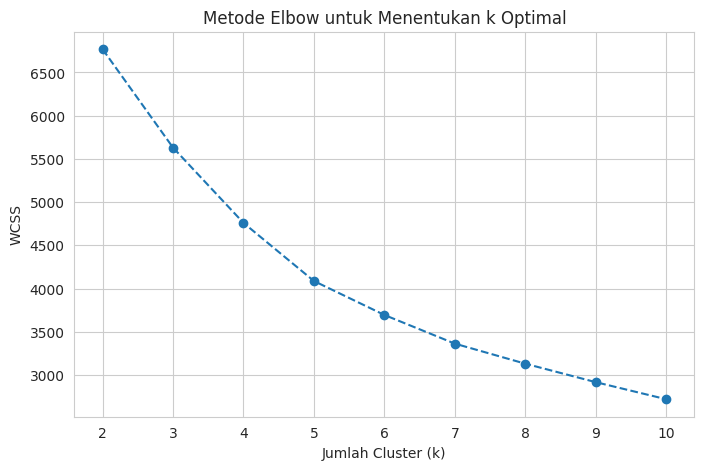

Jumlah Cluster: 2, Silhouette Score: 0.2404
Jumlah Cluster: 3, Silhouette Score: 0.2410
Jumlah Cluster: 4, Silhouette Score: 0.2390
Jumlah Cluster: 5, Silhouette Score: 0.2481
Jumlah Cluster: 6, Silhouette Score: 0.2438
Jumlah Cluster: 7, Silhouette Score: 0.2343
Jumlah Cluster: 8, Silhouette Score: 0.2280
Jumlah Cluster: 9, Silhouette Score: 0.2349
Jumlah Cluster: 10, Silhouette Score: 0.2396


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Pilih fitur numerik untuk clustering (pastikan tidak ada ID atau kolom yang tidak relevan)
numerical_columns = df.select_dtypes(include=['number']).columns
X = df[numerical_columns]

# Normalisasi data agar skala seragam
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Menentukan jumlah cluster optimal dengan Elbow Method
wcss = []  # Within-Cluster Sum of Squares
silhouette_scores = []  # Untuk menyimpan skor silhouette

K_range = range(2, 11)  # Coba jumlah cluster dari 2 sampai 10
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # Simpan nilai WCSS

    # Hitung silhouette score hanya jika jumlah cluster > 1
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o', linestyle='--')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('WCSS')
plt.title('Metode Elbow untuk Menentukan k Optimal')
plt.show()

# Cetak Silhouette Score untuk setiap k
for i, k in enumerate(K_range):
    print(f"Jumlah Cluster: {k}, Silhouette Score: {silhouette_scores[i]:.4f}")


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

# Salin dataset untuk preprocessing (agar tidak merusak df asli)
df_cleaned = df.copy()

# Pisahkan kolom numerik
df_numeric = df_cleaned.select_dtypes(include=["number"]).copy()

# Encoding data kategorikal (hanya jika masih diperlukan)
label_encoders = {}
for col in df_cleaned.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])  # Encode kategori ke angka
    label_encoders[col] = le  # Simpan encoder untuk inverse nanti

# Latih model K-Means dengan data yang sudah bersih
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_numeric["Cluster"] = kmeans.fit_predict(df_numeric)

# Tampilkan jumlah data per cluster
print("Jumlah data per cluster:")
print(df_numeric["Cluster"].value_counts())

# Tampilkan centroid cluster
print("\nCentroid dari setiap cluster:")
print(kmeans.cluster_centers_)



Jumlah data per cluster:
Cluster
1    840
3    531
4    382
0    292
2    192
Name: count, dtype: int64

Centroid dari setiap cluster:
[[1.09809932e+03 2.44287671e+02 2.35310582e+02 1.12930822e+03
  7.94520548e-01 2.03732877e+01 3.42839041e+02 2.81568493e+02
  5.00753425e+01 1.00000000e+00 4.43630137e+01 5.99315068e-01
  1.19708904e+02 1.00000000e+00 9.37833500e+03 1.79232877e+02]
 [1.12823690e+03 2.46325000e+02 2.48765369e+02 1.09705119e+03
  7.83333333e-01 2.13369048e+01 3.22746429e+02 2.98827381e+02
  4.80071429e+01 9.72619048e-01 3.42952381e+01 2.32500000e+00
  1.21322619e+02 1.00000000e+00 1.20942825e+03 1.80555952e+02]
 [1.13191146e+03 2.59770833e+02 2.49818906e+02 1.12464583e+03
  7.29166667e-01 2.24062500e+01 3.52890625e+02 2.96817708e+02
  4.80416667e+01 1.00520833e+00 5.07552083e+01 2.88657986e-15
  1.15734375e+02 1.00000000e+00 1.31493030e+04 1.89869792e+02]
 [1.09403013e+03 2.37785311e+02 2.38192599e+02 1.14436911e+03
  7.72128060e-01 1.99039548e+01 3.51056497e+02 2.9173446

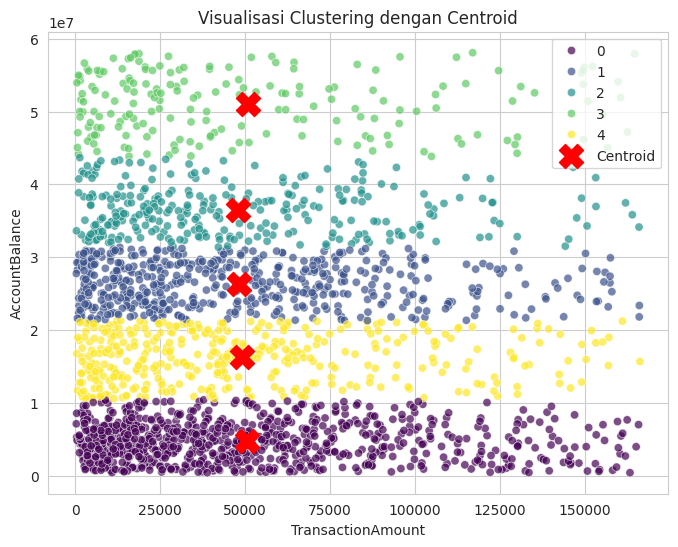

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pastikan KMeans sudah dilatih sebelumnya
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_numeric["Cluster"] = kmeans.fit_predict(df_numeric)

# Ambil centroid
centroids = kmeans.cluster_centers_

# Pilih dua fitur untuk visualisasi (ganti sesuai dataset)
feature_x = "TransactionAmount"
feature_y = "AccountBalance"

plt.figure(figsize=(8, 6))

# Scatter plot untuk setiap cluster
sns.scatterplot(
    x=df_numeric[feature_x],
    y=df_numeric[feature_y],
    hue=df_numeric["Cluster"],
    palette="viridis",
    alpha=0.7
)

# Tambahkan centroid ke plot
plt.scatter(
    centroids[:, df_numeric.columns.get_loc(feature_x)],
    centroids[:, df_numeric.columns.get_loc(feature_y)],
    s=300, c="red", marker="X", label="Centroid"
)

plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.title("Visualisasi Clustering dengan Centroid")
plt.legend()
plt.show()



## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [ ]:
# Inverse transform untuk fitur kategorikal yang telah diencode
for col in label_encoders.keys():
    df_numeric[col] = label_encoders[col].inverse_transform(df[col])

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [ ]:
# Pastikan scaler sudah dipakai sebelumnya untuk normalisasi/standarisasi
df_numeric[["TransactionAmount", "AccountBalance"]] = scaler.inverse_transform(
    df_numeric[["TransactionAmount", "AccountBalance"]]
)

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [ ]:
# Analisis ringkasan statistik per cluster
cluster_summary = df_numeric.groupby("Cluster").mean()
print(cluster_summary)

         TransactionID   AccountID  TransactionAmount  TransactionDate  \
Cluster                                                                  
0          1098.099315  244.287671       47757.128394      1129.308219   
1          1128.236905  246.325000       50473.914512      1097.051190   
2          1131.911458  259.770833       50686.644396      1124.645833   
3          1094.030132  237.785311       48339.064250      1144.369115   
4          1137.028796  250.500000       48940.904977      1115.426702   

         TransactionType   Location    DeviceID  IP Address  MerchantID  \
Cluster                                                                   
0               0.794521  20.373288  342.839041  281.568493   50.075342   
1               0.783333  21.336905  322.746429  298.827381   48.007143   
2               0.729167  22.406250  352.890625  296.817708   48.041667   
3               0.772128  19.903955  351.056497  291.734463   48.736347   
4               0.777487  21.78

# 🔍 Analisis Karakteristik Cluster dari Model KMeans  

Hasil clustering menunjukkan adanya lima kelompok pelanggan berdasarkan berbagai fitur seperti jumlah transaksi, saldo akun, usia pelanggan, durasi transaksi, dan lainnya.  

## **Cluster 0**  
- **Rata-rata Jumlah Transaksi:** Rp47,757  
- **Usia Pelanggan:** 44 tahun  
- **Saldo Rata-rata Akun:** Rp36,368,690  
- **Durasi Rata-rata Transaksi:** 119 detik  

**Analisis:**  
Pelanggan dalam cluster ini memiliki usia menengah dan saldo akun cukup besar, menunjukkan bahwa mereka memiliki stabilitas finansial. Namun, jumlah transaksi mereka tidak terlalu tinggi. Mereka kemungkinan merupakan pelanggan reguler dengan tingkat transaksi yang stabil.  

---  

## **Cluster 1**  
- **Rata-rata Jumlah Transaksi:** Rp50,473  
- **Usia Pelanggan:** 34 tahun  
- **Saldo Rata-rata Akun:** Rp4,694,558  
- **Durasi Rata-rata Transaksi:** 121 detik  

**Analisis:**  
Cluster ini memiliki pelanggan yang lebih muda dengan jumlah transaksi yang lebih tinggi dibandingkan Cluster 0, namun saldo rata-rata mereka jauh lebih rendah. Ini bisa menunjukkan bahwa pelanggan dalam kelompok ini cenderung lebih aktif dalam bertransaksi, tetapi memiliki saldo akun yang lebih kecil, mungkin karena lebih sering menggunakannya untuk pembayaran atau belanja.  

---  

## **Cluster 2**  
- **Rata-rata Jumlah Transaksi:** Rp50,686  
- **Usia Pelanggan:** 50 tahun  
- **Saldo Rata-rata Akun:** Rp50,990,250  
- **Durasi Rata-rata Transaksi:** 115 detik  

**Analisis:**  
Cluster ini terdiri dari pelanggan yang lebih tua dengan saldo akun tertinggi. Mereka mungkin merupakan pelanggan premium atau pelanggan dengan daya beli tinggi. Meski saldo mereka besar, durasi transaksi mereka cenderung lebih singkat, yang bisa menunjukkan efisiensi dalam bertransaksi.  

---  

## **Cluster 3**  
- **Rata-rata Jumlah Transaksi:** Rp48,339  
- **Usia Pelanggan:** 52 tahun  
- **Saldo Rata-rata Akun:** Rp26,211,960  
- **Durasi Rata-rata Transaksi:** 117 detik  

**Analisis:**  
Kelompok ini terdiri dari pelanggan yang lebih tua, dengan saldo akun yang cukup besar namun jumlah transaksi sedikit lebih rendah dibanding Cluster 2. Mereka mungkin merupakan pelanggan yang lebih berhati-hati dalam melakukan transaksi atau hanya melakukan transaksi dalam jumlah besar sesekali.  

---  

## **Cluster 4**  
- **Rata-rata Jumlah Transaksi:** Rp48,940  
- **Usia Pelanggan:** 54 tahun  
- **Saldo Rata-rata Akun:** Rp16,069,140  
- **Durasi Rata-rata Transaksi:** 114 detik  

**Analisis:**  
Pelanggan dalam kelompok ini memiliki usia tertinggi tetapi saldo akun yang relatif lebih kecil. Mereka mungkin bukan pelanggan yang sering melakukan transaksi besar, atau mereka memiliki kebiasaan menyimpan saldo lebih kecil untuk transaksi reguler.  

---  

## 📌 **Kesimpulan & Rekomendasi:**  
- **Cluster 2** bisa menjadi target untuk produk atau layanan premium karena mereka memiliki saldo akun tinggi.  
- **Cluster 1** menunjukkan pelanggan muda yang aktif bertransaksi, bisa menjadi target untuk promosi dan diskon.  
- **Cluster 4** meski lebih tua, memiliki saldo lebih kecil, mungkin membutuhkan program loyalitas agar lebih aktif bertransaksi.  


# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [ ]:
# Simpan hasil clustering ke dalam file CSV
df_numeric.to_csv("dataset_clustering.csv", index=False)

print("Hasil clustering telah disimpan dalam 'dataset_clustering.csv'")

Hasil clustering telah disimpan dalam 'dataset_clustering.csv'
